In [2]:
import numpy as np
import pandas as pd

# Generate timestamps (100 data points, 5-minute intervals)
timestamp_start = pd.Timestamp("2024-01-01 00:00:00")
timestamps = [timestamp_start + pd.Timedelta(minutes=5 * i) for i in range(100)]

# Generate random values
values = np.random.rand(100) * 100  # Random values between 0 and 100

# Convert to NumPy array (reshaped for TimeGAN)
data = np.array(values).reshape(-1, 1)  # Shape (100, 1)
seq_length = 10  # Sequence length for TimeGAN

# Convert to sequences (past 10 values per sample)
time_series = []
for i in range(len(data) - seq_length):
    time_series.append(data[i:i + seq_length])

# Convert to NumPy array
ori_data = np.array(time_series)  # Shape (90, 10, 1)

print(f"Original Data Shape: {ori_data.shape}")  # (90, 10, 1)
ori_data

Original Data Shape: (90, 10, 1)


array([[[69.00279452],
        [66.01415866],
        [89.87302127],
        [28.60126933],
        [76.80536022],
        [21.23903241],
        [30.17271069],
        [54.7968733 ],
        [51.86245356],
        [61.97517366]],

       [[66.01415866],
        [89.87302127],
        [28.60126933],
        [76.80536022],
        [21.23903241],
        [30.17271069],
        [54.7968733 ],
        [51.86245356],
        [61.97517366],
        [50.40897356]],

       [[89.87302127],
        [28.60126933],
        [76.80536022],
        [21.23903241],
        [30.17271069],
        [54.7968733 ],
        [51.86245356],
        [61.97517366],
        [50.40897356],
        [32.11015284]],

       [[28.60126933],
        [76.80536022],
        [21.23903241],
        [30.17271069],
        [54.7968733 ],
        [51.86245356],
        [61.97517366],
        [50.40897356],
        [32.11015284],
        [40.60832443]],

       [[76.80536022],
        [21.23903241],
        [30.17271069],
   

In [2]:
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

metric_iteration = 1

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Epoch 0, D_loss: 2.0062
Discriminative score: 0.0


In [3]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

2025-01-30 13:58:23.243259: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-30 13:58:23.307434: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-30 13:58:23.433383: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-30 13:58:23.685513: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-30 13:58:24.189535: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-30 13:58:25.190741: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Predictive score: 46.0697


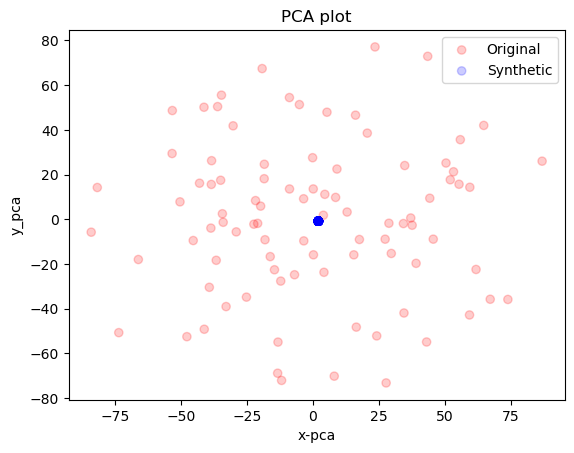

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.000s...
[t-SNE] Computed neighbors for 180 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 0.003323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.733101
[t-SNE] KL divergence after 300 iterations: 0.433229


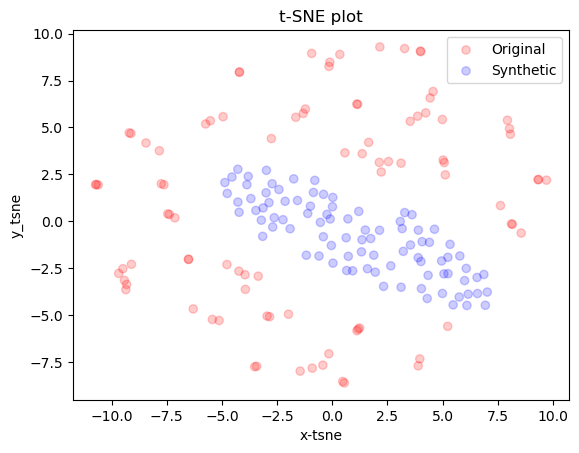

In [4]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

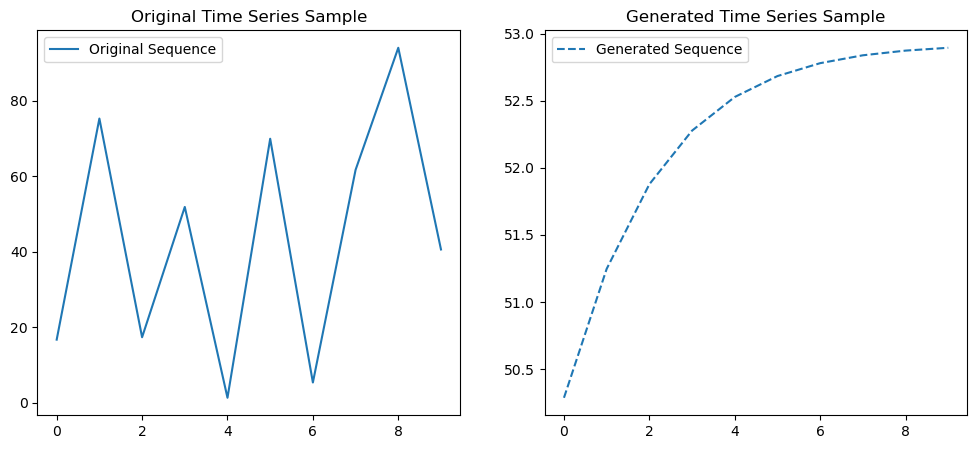

In [9]:
import matplotlib.pyplot as plt

# Plot original and generated data
plt.figure(figsize=(12, 5))

# Original Data Sample
plt.subplot(1, 2, 1)
plt.plot(ori_data[0].squeeze(), label="Original Sequence")
plt.title("Original Time Series Sample")
plt.legend()

# Generated Data Sample
plt.subplot(1, 2, 2)
plt.plot(generated_data[10].numpy().squeeze(), label="Generated Sequence", linestyle="dashed")
plt.title("Generated Time Series Sample")
plt.legend()

plt.show()


In [11]:
# Convert generated_data to NumPy array
generated_dataa = np.array(generated_data)

# Compute Reconstruction Error (Mean Absolute Error)
reconstruction_error = np.mean(np.abs(ori_data - generated_dataa), axis=(1, 2))

# Print error statistics
print(f"Reconstruction Error Stats: Min={np.min(reconstruction_error)}, Max={np.max(reconstruction_error)}, Mean={np.mean(reconstruction_error)}")

Reconstruction Error Stats: Min=17.539953398603068, Max=33.76883799331331, Mean=26.28219426835856


In [12]:
# Set anomaly threshold (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)

# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

print(f"Outlier Indices: {outliers}")

Outlier Indices: [40 41 75 87 88]


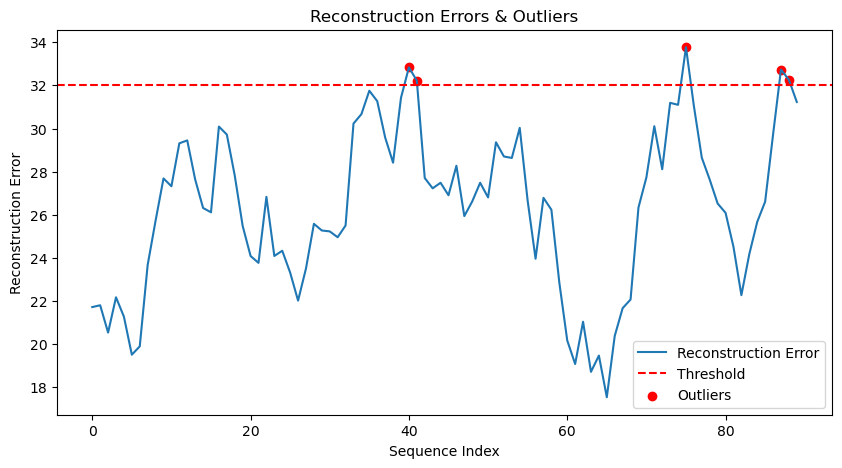

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(reconstruction_error, label="Reconstruction Error")
plt.axhline(threshold, color="r", linestyle="--", label="Threshold")
plt.scatter(outliers, reconstruction_error[outliers], color="red", label="Outliers")
plt.title("Reconstruction Errors & Outliers")
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()


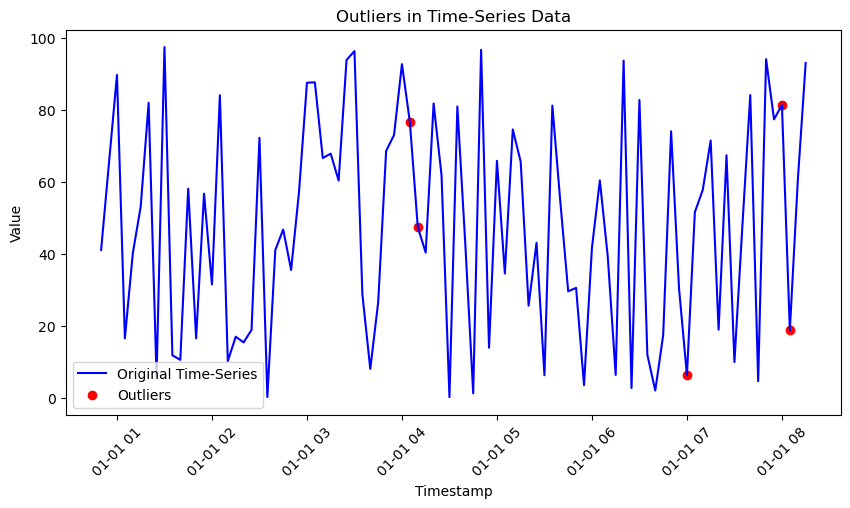

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(timestamps[seq_length:], values[seq_length:], label="Original Time-Series", color="blue")
plt.scatter(
    [timestamps[i + seq_length - 1] for i in outliers],  # Last timestamp of each outlier sequence
    [values[i + seq_length - 1] for i in outliers], 
    color="red", 
    label="Outliers"
)
plt.title("Outliers in Time-Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.show()
